In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [16]:
em = pd.read_csv("EM_N100.csv")

In [17]:
em

,Temp,E_mean,E_std,M_mean,M_std
0,0.00,-2.000000,0.000000,1.000000,0.000000
1,0.01,-2.000000,0.000000,1.000000,0.000000
2,0.02,-2.000000,0.000000,1.000000,0.000000
3,0.03,-2.000000,0.000000,1.000000,0.000000
4,0.04,-2.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...
495,4.95,-0.381407,0.015565,-0.000836,0.016150
496,4.96,-0.379572,0.015781,0.001023,0.016065
497,4.97,-0.378185,0.015460,0.000351,0.016084
498,4.98,-0.377197,0.014799,0.001907,0.017654


In [33]:
em= em[1:]

## Heat Capacity

$$
c_v = \frac{k}{T^2} Var{E}
$$

set $\beta=1$
$$
c_v = \frac{1}{T} Var{E}
$$

In [34]:
def get_cv(data):

    cv = 1/data["Temp"] * data["E_std"]**2
    return cv

Text(0.5, 1.0, 'Heat Capacity Plots')

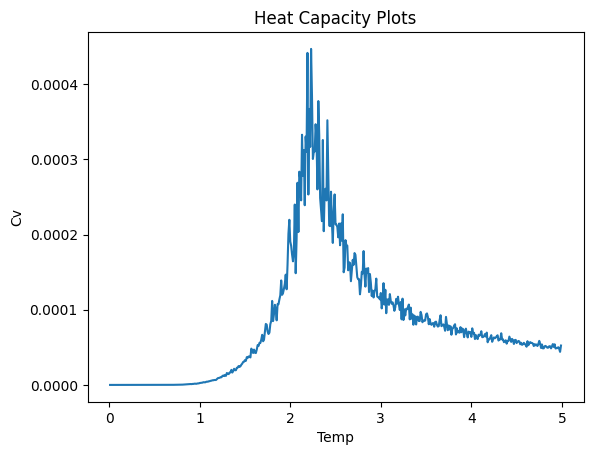

In [35]:
plt.plot(em["Temp"], get_cv(em))
plt.xlabel("Temp")
plt.ylabel("Cv")
plt.title("Heat Capacity Plots")

In [36]:
def exponential_growth(x, k, A):
    return A*np.exp(x / k)

In [37]:
get_cv(em)[0:index]

1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
         ...   
223    0.000447
224    0.000385
225    0.000301
226    0.000310
227    0.000310
Length: 227, dtype: float64

# Finding Tc

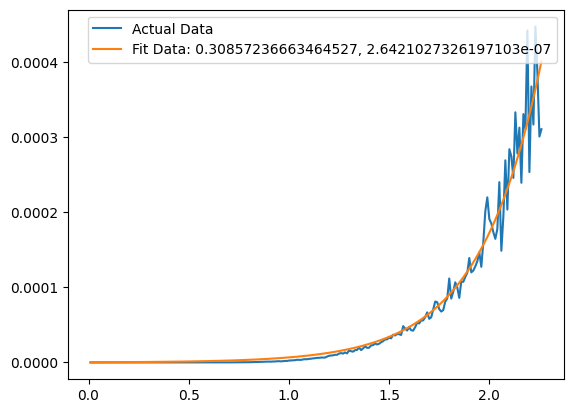

In [38]:
true_tc = 2.269

difference_array = np.absolute(em["Temp"]-true_tc)
 
# find the index of minimum element from the array
index = difference_array.argmin()

# Left Fit



popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))

plt.plot(em["Temp"][0:index], get_cv(em)[0:index], label= "Actual Data")
plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


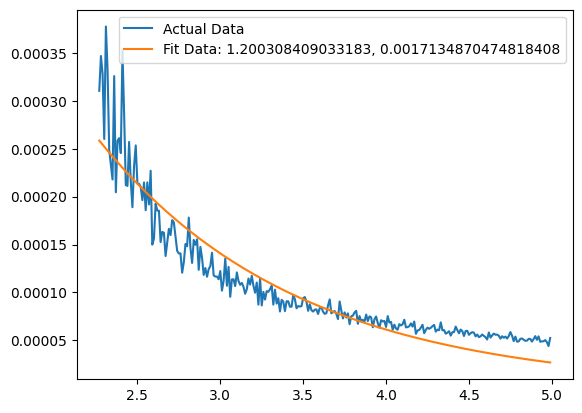

In [39]:
# Right Fit

popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))

plt.plot(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data")
plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
plt.legend()


In [40]:
index

226

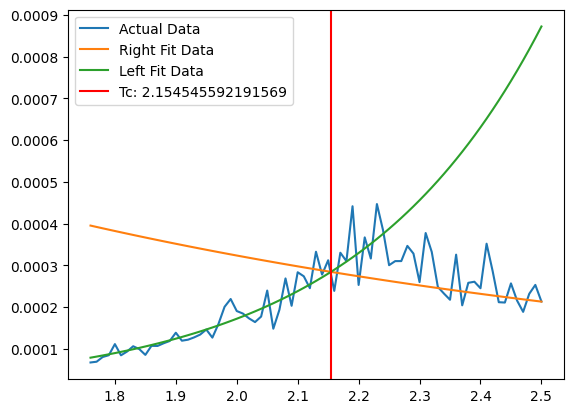

In [54]:
min_cutoff = 175
max_cutoff = 250

plt.plot(em["Temp"][min_cutoff:max_cutoff], get_cv(em[min_cutoff:max_cutoff]), label= "Actual Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()


# Magnetization

Text(0, 0.5, 'Aveage Site Magnetization')

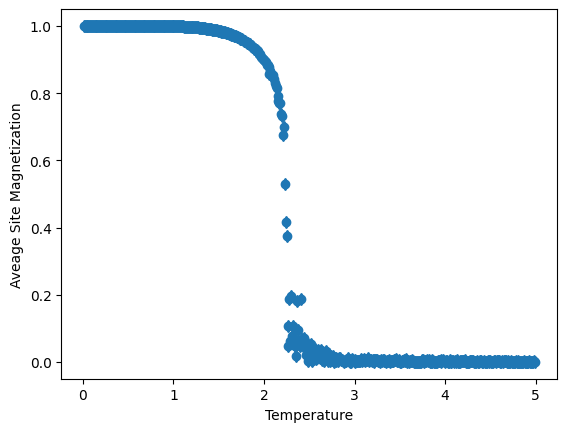

In [55]:
#plt.plot(em["Temp"], em["M_mean"])
plt.errorbar(em["Temp"], np.absolute(em["M_mean"]), yerr=em["M_std"], uplims=True, lolims=True,fmt='o')
plt.xlabel('Temperature')
plt.ylabel('Aveage Site Magnetization')

In [56]:
def sigmoid(x, a, b, c):
    return  a - a / (1 + np.exp(-b * (x - c)))

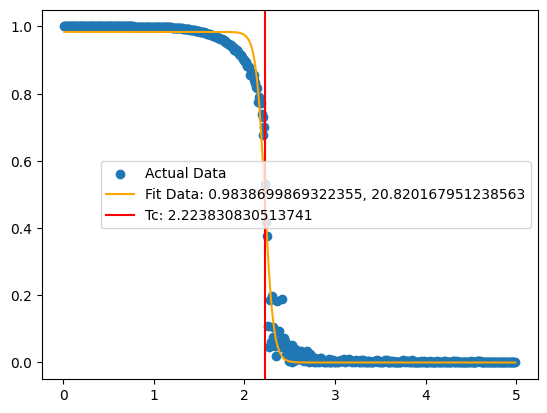

In [57]:
popt_l, pcov_l = curve_fit(sigmoid, em["Temp"], np.absolute(em["M_mean"]), p0=(1.0, 1,1))

plt.scatter(em["Temp"], np.absolute(em["M_mean"]), label= "Actual Data")
plt.plot(em["Temp"], sigmoid(em["Temp"], *popt_l), label= "Fit Data: {}, {}".format(*popt_l), color= "orange")
plt.axvline(popt_l[2], label = "Tc: {}".format(popt_l[2]), color = "r")
plt.legend()


## Magnetic Susceptibility

$\chi = \beta Var(M)$

set $\beta = 1$

$\chi = Var(M)$

In [58]:
def get_ms(data):

    ms = data["M_std"]**2
    return ms

Text(0.5, 1.0, 'Magnetic Susceptibility Plots')

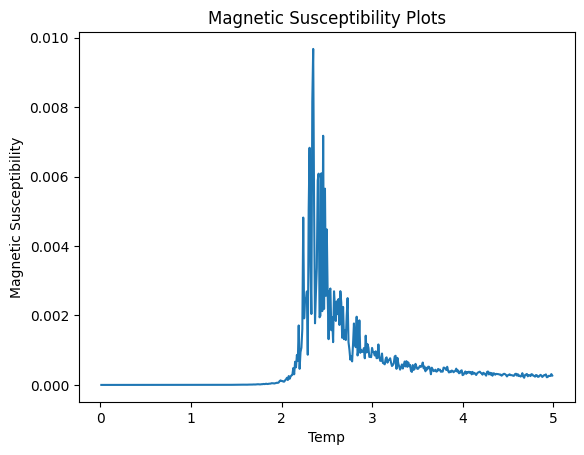

In [59]:
plt.plot(em["Temp"], get_ms(em))
plt.xlabel("Temp")
plt.ylabel("Magnetic Susceptibility")
plt.title("Magnetic Susceptibility Plots")

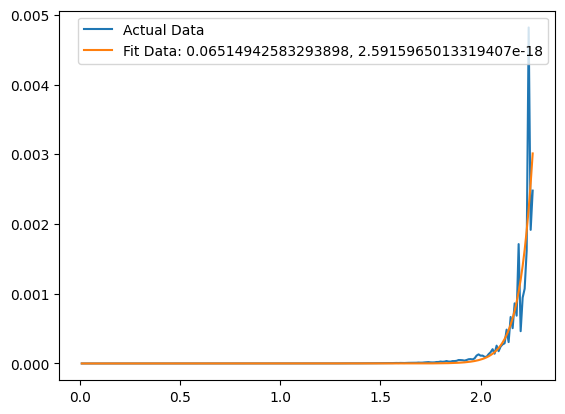

In [60]:
popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_ms(em)[0:index], p0=(1.0, 1))

plt.plot(em["Temp"][0:index], get_ms(em)[0:index], label= "Actual Data")
plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


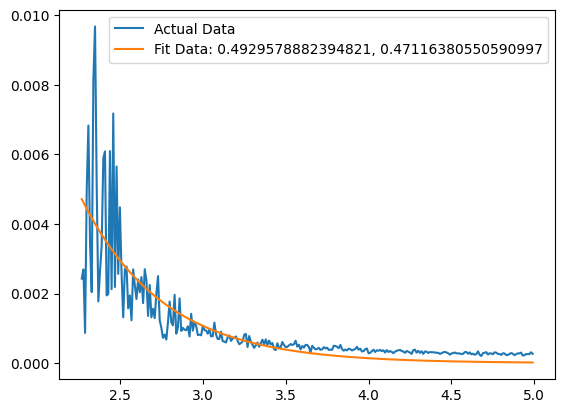

In [61]:
# Right Fit

popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_ms(em)[index:], p0=(1.0, 1))

plt.plot(em["Temp"][index:], get_ms(em)[index:], label= "Actual Data")
plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
plt.legend()

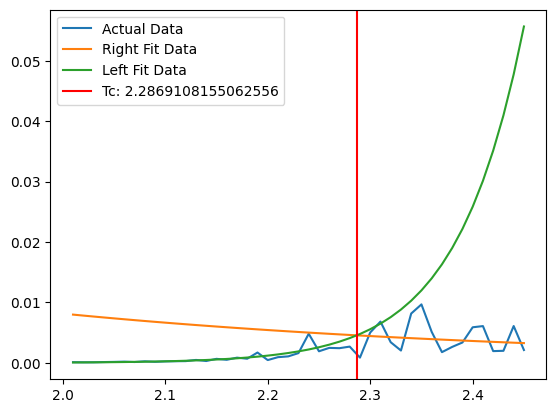

In [67]:
min_cutoff = 200
max_cutoff = 245

plt.plot(em["Temp"][min_cutoff:max_cutoff], get_ms(em[min_cutoff:max_cutoff]), label= "Actual Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()




## Correlation Length

In [68]:
sc = pd.read_csv("SC_N100.csv", index_col = "Temp")
sc = sc.iloc[:, :-1]

In [69]:
sc.shape

(500, 49)

In [70]:
sc

,d=1,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,...,d=40,d=41,d=42,d=43,d=44,d=45,d=46,d=47,d=48,d=49
Temp,,,,,,,,,,,,,,,,,,,,,
0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.95,0.001694,0.000239,-0.000004,0.000015,-0.000103,-0.000156,-0.000213,-0.000229,-0.000172,-0.000199,...,-0.000098,-0.000064,-0.000078,-0.000056,-0.000155,-0.000106,-0.000101,0.000022,-0.000045,-0.000147
4.96,0.001776,0.000361,0.000030,-0.000036,-0.000111,-0.000101,-0.000242,-0.000094,-0.000153,-0.000331,...,0.000152,-0.000109,-0.000234,-0.000171,-0.000223,-0.000275,-0.000191,-0.000340,-0.000326,-0.000067
4.97,0.001646,0.000145,-0.000160,-0.000107,-0.000140,-0.000193,-0.000094,-0.000278,-0.000170,-0.000188,...,0.000031,-0.000346,-0.000304,-0.000184,-0.000247,-0.000221,-0.000167,-0.000035,0.000022,-0.000048


In [188]:


# Exponential decay function
def exponential_decay(x, k):
    return np.exp(-x / k)

In [189]:
def cor_len(data):
    T =data.shape[0]
    Ks = []
    for i in range(T):
        
        popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )
        Ks.append(popt[0])
    return data.index, Ks

        

    

In [191]:
i= 95
curve_fit(exponential_decay, [i+1 for i in range(sc.shape[1])], sc.iloc[i], p0=(10), maxfev= 2000)

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_6045/1177267021.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  curve_fit(exponential_decay, [i+1 for i in range(sc.shape[1])], sc.iloc[i], p0=(10), maxfev= 2000)


(array([0.00865645]), array([[inf]]))

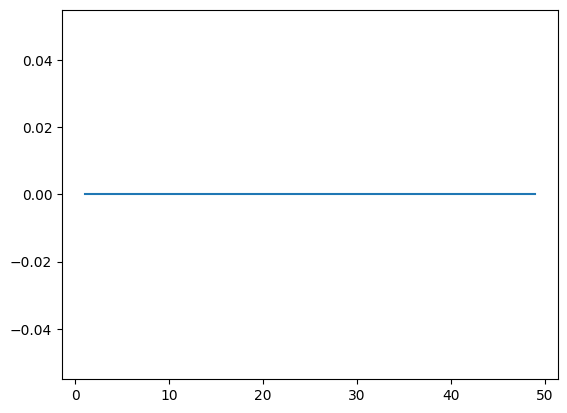

In [175]:
plt.plot([i+1 for i in range(sc.shape[1])], sc.iloc[i])

In [192]:
T, k= cor_len(sc)

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_6045/3651670814.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


In [163]:
T

Float64Index([ 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
              ...
               4.9, 4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99],
             dtype='float64', name='Temp', length=500)

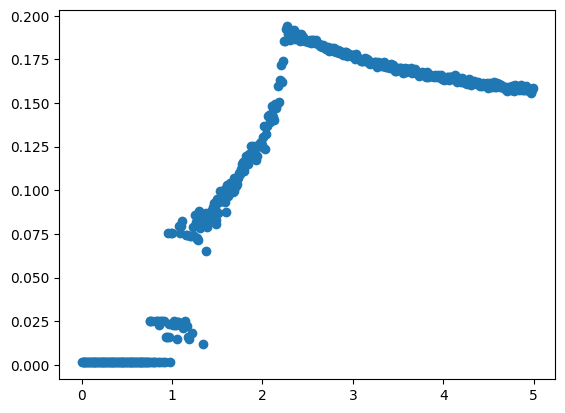

In [193]:
plt.scatter(T, k)

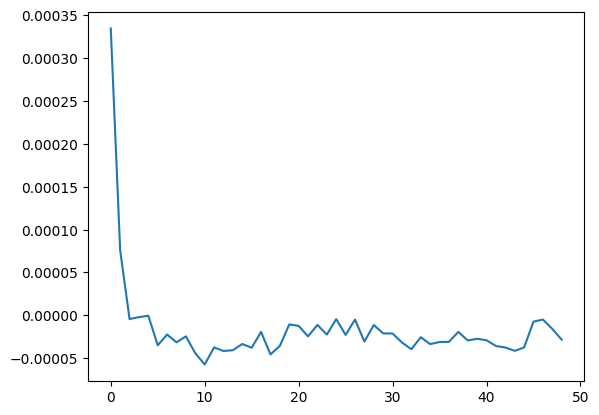

In [165]:
i = 200
plt.plot([i for i in range(sc.shape[1])], sc.iloc[i])

Text(0.5, 1.0, 'Correlation Length Plots')

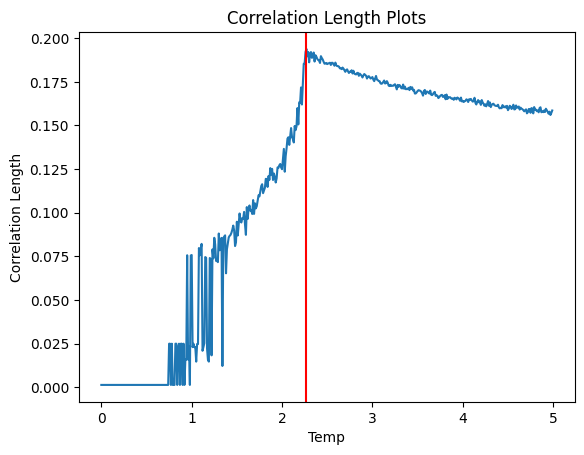

In [199]:
plt.plot(T,k)
plt.xlabel("Temp")
plt.axvline(2.269, color = "r")
plt.ylabel("Correlation Length")
plt.title("Correlation Length Plots")

In [187]:
T[np.argmax(k)]

1.03

In [195]:
popt_l, pcov_l = curve_fit(exponential_growth, sc.index[0:index], cor_len(sc)[0:index], p0=(1.0, 1))

plt.plot(sc.index[0:index], cor_len(sc)[0:index], label= "Actual Data")
plt.plot(sc.index[0:index], exponential_growth(sc.index[0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_6045/3651670814.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


ValueError: operands could not be broadcast together with shapes (226,) (2,500) 

In [196]:
# Right Fit

popt_r, pcov_r = curve_fit(exponential_decay, sc.index[index:], cor_len(sc)[index:], p0=(1.0, 1))

plt.plot(sc.index[index:], cor_len(sc)[index:], label= "Actual Data")
plt.plot(sc.index[index:], exponential_decay(sc.index[index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
plt.legend()

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_6045/3651670814.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


ValueError: `ydata` must not be empty!

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_6045/3651670814.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


ValueError: x and y must have same first dimension, but have shapes (150,) and (2, 500)

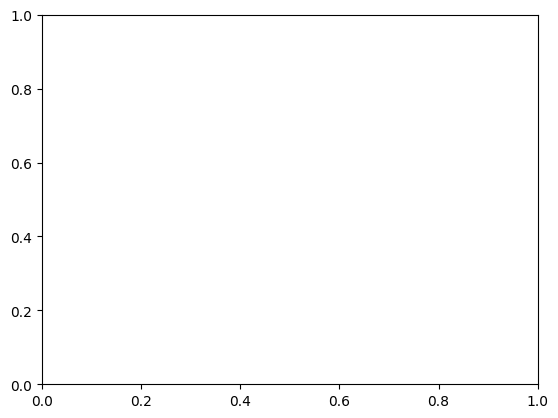

In [197]:
min_cutoff = 0
max_cutoff = 150

plt.plot(sc.index[min_cutoff:max_cutoff], cor_len(sc)[min_cutoff:max_cutoff], label= "Actual Data")
plt.plot(sc.index[min_cutoff:max_cutoff], exponential_decay(sc.index[min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
plt.plot(sc.index[min_cutoff:max_cutoff], exponential_growth(sc.index[min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()


# plt.plot(sc.index[30:90], cor_len(sc)[30:90], label= "Actual Data")
# plt.plot(sc.index[30:90], exponential_decay(sc.index[30:90], *popt_r), label= "Right Fit Data")
# plt.plot(sc.index[30:90], exponential_growth(sc.index[30:90], *popt_l), label= "Left Fit Data")
# plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
# plt.legend()